# Rainfall Prediction Using Linear Regression

In [1]:
#importing the libraries
import pandas as pd
import numpy as np

In [2]:
#read the data
data=pd.read_csv('austin_weather.csv')

In [3]:
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [4]:
#Firstly,
#Drop the unnecessary columns
data=data.drop(['Events','Date','SeaLevelPressureLowInches'],axis=1)

In [5]:
#We have to replace the catagorical variable called 'T'
#because model will not take any of the catagorical term 
data=data.replace('T',0.0)

In [6]:
data=data.replace('-',0.0)

Since we have done so much preprocessing let's store the preprocessed data into a new csv file

In [7]:
data.to_csv('austin_weather_final.csv')

In [8]:
#importing libraries
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [9]:
data=pd.read_csv('austin_weather_final.csv')

In [10]:
data.head()

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.00


In [11]:
x=data.drop(['PrecipitationSumInches'],axis=1)

In [12]:
y=data['PrecipitationSumInches']

In [13]:
#reshaping it into 2d vector
y=y.values.reshape(-1,1)

In [14]:
day_index=798
days=[i for i in range(y.size)]


In [15]:
#Intialise the linear regression classifier
clf=LinearRegression()

#Train the classifier
clf.fit(x,y)

LinearRegression()

The precipitation trend graph:


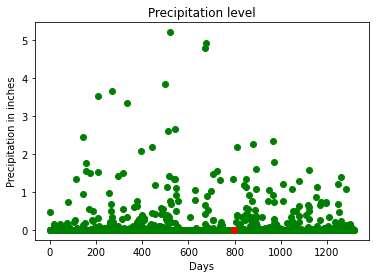

In [16]:
#Now, plot a graph
print('The precipitation trend graph:')
plt.scatter(days,y,color='g')
plt.scatter(days[day_index],y[day_index],color='r')
plt.title('Precipitation level')
plt.xlabel('Days')
plt.ylabel('Precipitation in inches')
plt.show()
x_vis=x.filter(['TempAvgr','DewPointAvgf','HumidityAvgPercent','VisibilityAvgMiles','WindAvgMPH'])

The precipitation vs attributes trend graph:


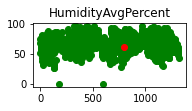

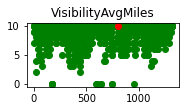

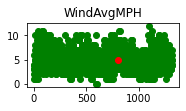

In [17]:
print('The precipitation vs attributes trend graph:')

for i in range(x_vis.columns.size):
    plt.subplot(3,2,i+1)
    plt.scatter(days,x_vis[x_vis.columns.values[i][:100]],color='g')
    plt.scatter(days[day_index],x_vis[x_vis.columns.values[i]][day_index],color='r')
    plt.title(x_vis.columns.values[i])
    plt.show()    